In [5]:
%config InlineBackend.rc = {"figure.dpi": 72, 'figure.figsize': (6.0, 4.0)}
%matplotlib inline

import abtem
import matplotlib.pyplot as plt
import numpy as np
from ase.build import mx2
from ase.io import read

abtem.config.set({"local_diagnostics.progress_bar": False});

(walkthrough:partial_coherence)
# Partial coherence

In our introduction to the contrast transfer function, we described how partial coherence may be approximated by multiplication with an envelope function. This approach is not always appropriate for simulating experiments with plane wave illumination and it is never appropriate for simulating experiments with a convergent beam.  

## Partial coherence with plane waves

In [6]:
exit_wave = abtem.PlaneWave(energy=80e3, sampling=0.05).multislice(mx2(vacuum=2))

In [7]:
Cs = -20e-6 * 1e10
focal_spread = 52.50

# Create coherent CTF
ctf_coherent = abtem.CTF(Cs=Cs, energy=80e3)
ctf_coherent.defocus = ctf_coherent.scherzer_defocus
ctf_coherent.semiangle_cutoff = ctf_coherent.crossover_angle

# Create CTF with temporal coherence envelope
ctf_quasi_coherent = ctf_coherent.copy()
ctf_quasi_coherent.focal_spread = focal_spread

# Run multislice and get intensity
image_coherent = exit_wave.apply_ctf(ctf_coherent).intensity()
image_quasi_coherent = exit_wave.apply_ctf(ctf_quasi_coherent).intensity()

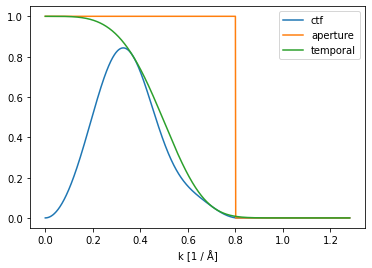

In [8]:
ctf_quasi_coherent.profiles().show();


$$
    I_{incoherent} = \int_{-\infty}^{\infty} p(\Delta f) I(\Delta f)  \ \mathrm{d} \Delta f
$$



The image intensity given an exit wave function, $\psi_{exit}$, and the phase aberrations, $\chi(\Delta f)$, with the defocus, $\Delta f$, may be written
$$
    I(\Delta f) = \left\| \mathcal{F^{-1}}\left[ \hat{\psi}_{exit} \exp(-i \chi(\Delta f) \right] \right\|^2 \quad ,
$$
where for clarity we have omitted the coordinates.

where 

$$
    p(\Delta f) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{(\Delta f_0 - \Delta f) ^ 2}{2\sigma ^ 2}\right)
$$
where $\sigma$ is the focal spread 

We approximate Eq. as a Riemann sum
$$
    I_{incoherent} = \sum_{\Delta f_n} p(\Delta f_n) I(\Delta f_n)
$$







In [32]:
ctf_incoherent = ctf_coherent.copy()

defocus = abtem.distributions.gaussian(
    center=ctf_incoherent.scherzer_defocus,
    standard_deviation=focal_spread,
    num_samples=7,
    sampling_limit=1.21,
)

ctf_incoherent.defocus = defocus

In [33]:
1/np.exp(1/2) * 2

1.2130613194252668

In [34]:
images_incoherent = exit_wave.apply_ctf(ctf_incoherent).intensity()

images_incoherent

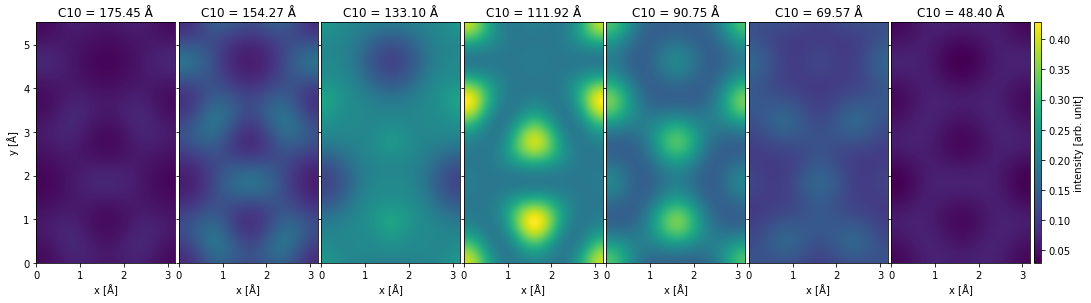

In [35]:
images_incoherent.show(
    explode=True,
    figsize=(18, 5),
    common_color_scale=True,
    image_grid_kwargs={"axes_pad": 0.05},
    cbar=True,
);

In [36]:
image_incoherent = images_incoherent.sum(0)

stack = abtem.stack(
    [image_coherent, image_quasi_coherent, image_incoherent],
    ("coherent", "quasi-coherent", "incoherent"),
)

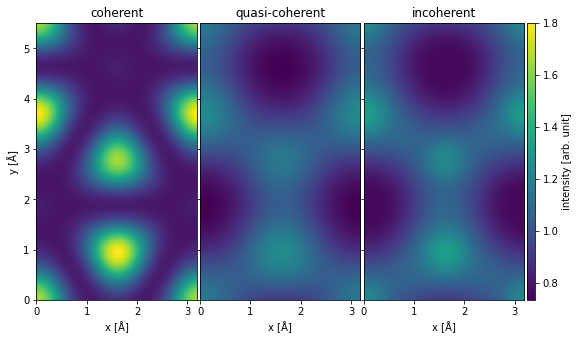

In [37]:
stack.show(
    common_color_scale=True,
    explode=True,
    cbar=True,
    figsize=(18, 5),
    image_grid_kwargs={"axes_pad": 0.05},
);

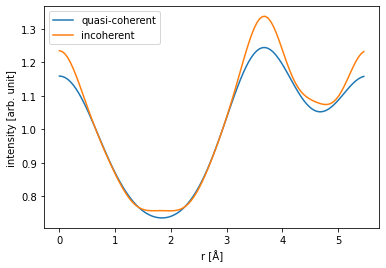

In [38]:
stack[1:].interpolate_line(start=(0, 0), end=(0, stack.extent[1])).show();

## Partial coherence with probes